# ***Global Countries Information 2023***

## 1. Introduction

This comprehensive notebook provides a wealth of information about countries worldwide, encompassing a wide range of indicators and attributes. With demographic statistics, economic indicators, environmental factors, healthcare metrics, education statistics, and more, this dataset offers a complete global perspective on various aspects of nations. We will delve into the data to extract insights, perform exploratory data analysis (EDA), and draw meaningful conclusions.

## 2. Data Cleaning & Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Dataset
df = pd.read_csv('/content/Expt-2-world-data-2023.csv')

In [13]:
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60.0,AF,58.1,652230.0,323000.000000,32.49,93.0,Kabul,8672.0,...,78.4,0.28,38041754.0,48.900000,9.300000,71.400000,11.120000,9797273.0,33.939110,67.709953
1,Albania,105.0,AL,43.1,28748.0,9000.000000,11.78,355.0,Tirana,4536.0,...,56.9,1.20,2854191.0,55.700000,18.600000,36.600000,12.330000,1747593.0,41.153332,20.168331
2,Algeria,18.0,DZ,17.4,2381741.0,317000.000000,24.28,213.0,Algiers,150006.0,...,28.1,1.72,43053054.0,41.200000,37.200000,66.100000,11.700000,31510100.0,28.033886,1.659626
3,Andorra,164.0,AD,40.0,468.0,159274.853801,7.20,376.0,Andorra la Vella,469.0,...,36.4,3.33,77142.0,62.738068,16.573964,40.822404,6.886364,67873.0,42.506285,1.521801
4,Angola,26.0,AO,47.5,1246700.0,117000.000000,40.73,244.0,Luanda,34693.0,...,33.4,0.21,31825295.0,77.500000,9.200000,49.100000,6.890000,21061025.0,-11.202692,17.873887


In [3]:
# Data Type Conversion:
columns_to_convert = ['Density\n(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)',
                      'Birth Rate', 'Co2-Emissions', 'Forested Area (%)',
                      'CPI', 'CPI Change (%)', 'Fertility Rate', 'Gasoline Price', 'GDP',
                      'Gross primary education enrollment (%)', 'Armed Forces size',
                      'Gross tertiary education enrollment (%)', 'Infant mortality',
                      'Life expectancy', 'Maternal mortality ratio', 'Minimum wage',
                      'Out of pocket health expenditure', 'Physicians per thousand',
                      'Population', 'Population: Labor force participation (%)',
                      'Tax revenue (%)', 'Total tax rate', 'Unemployment rate', 'Urban_population']

df[columns_to_convert] = df[columns_to_convert].applymap(lambda x: float(str(x).replace(',', '').replace('$', '').replace('%', '')))

In [4]:
# List of columns with missing values
columns_with_missing = df.columns[df.isnull().any()]

# Impute numerical columns with mean
numerical_columns = df.select_dtypes(include=['float64'])
numerical_columns = numerical_columns.columns[numerical_columns.isnull().any()]
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Impute categorical columns with mode
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns = categorical_columns.columns[categorical_columns.isnull().any()]
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Verify if all missing values are handled
missing_counts = df.isnull().sum()
print(missing_counts)

Country                                      0
Density\n(P/Km2)                             0
Abbreviation                                 0
Agricultural Land( %)                        0
Land Area(Km2)                               0
Armed Forces size                            0
Birth Rate                                   0
Calling Code                                 0
Capital/Major City                           0
Co2-Emissions                                0
CPI                                          0
CPI Change (%)                               0
Currency-Code                                0
Fertility Rate                               0
Forested Area (%)                            0
Gasoline Price                               0
GDP                                          0
Gross primary education enrollment (%)       0
Gross tertiary education enrollment (%)      0
Infant mortality                             0
Largest city                                 0
Life expectan

## 3. Top 20 Countries: Highest Unemployment

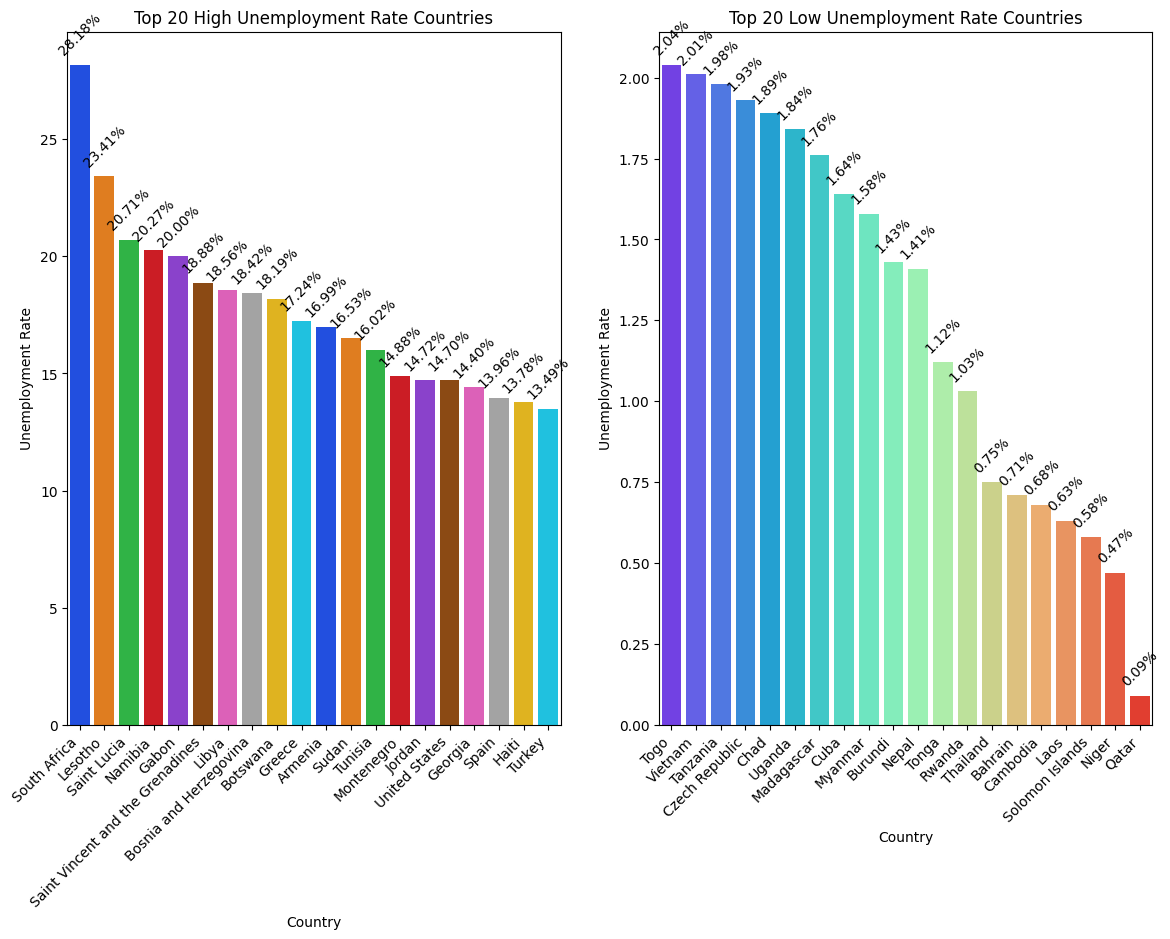

In [5]:
sorted_df = df.sort_values(by = 'Unemployment rate', ascending = False)

top_high_unemployment = sorted_df.head(20)
top_low_unemployment = sorted_df.tail(20)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))

# Plot for high unemployment countries
sns.barplot(data=top_high_unemployment, x='Country', y='Unemployment rate', palette='bright', ax=axes[0])
axes[0].set_title('Top 20 High Unemployment Rate Countries')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Unemployment Rate')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points', rotation = 45)

# Plot for low unemployment countries
sns.barplot(data=top_low_unemployment, x='Country', y='Unemployment rate', palette='rainbow', ax=axes[1])
axes[1].set_title('Top 20 Low Unemployment Rate Countries')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Unemployment Rate')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                     textcoords='offset points', rotation = 45)
plt.show()

## 4. Top 20 Countries: Highest Population

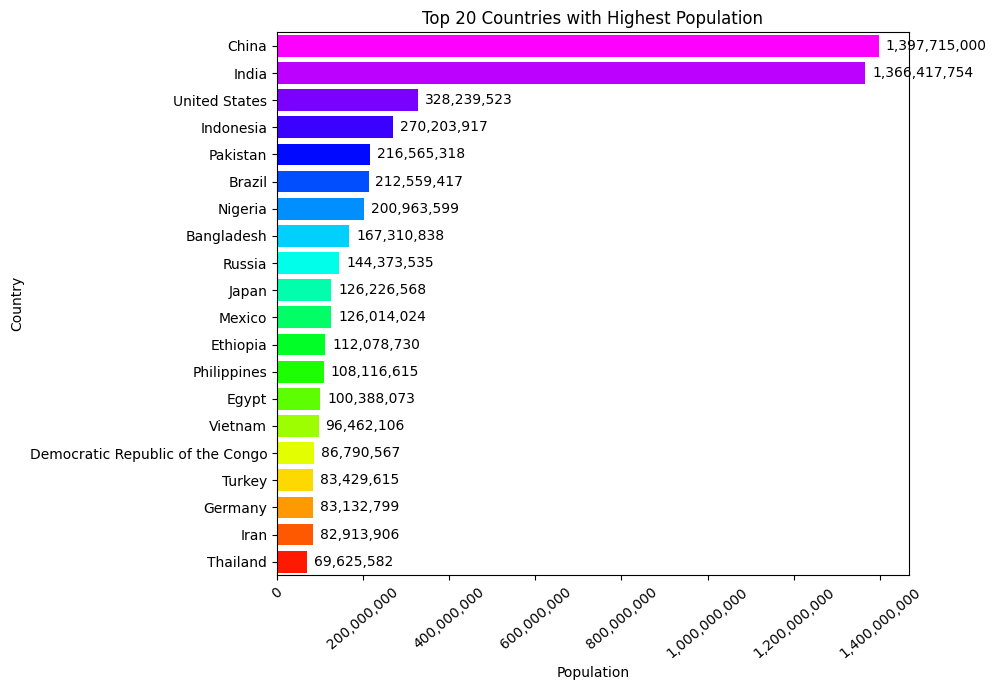

In [6]:
import matplotlib.ticker as ticker

sorted_df = df.sort_values(by='Population', ascending=False)

# Get the top 20 countries with the highest population
top_population_country = sorted_df.head(20)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Plot for top population countries
sns.barplot(data=top_population_country, x='Population', y='Country', palette='gist_rainbow_r', saturation=0.99, ax=axes)
axes.set_title('Top 20 Countries with Highest Population')
axes.set_xlabel('Population')
axes.set_ylabel('Country')
axes.set_xticklabels(['{:,}'.format(int(x)) for x in axes.get_xticks()], rotation = 40)
for p in axes.patches:
    axes.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                     xytext=(5, 0), textcoords='offset points', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

## 5. Top 20 Countries: Highest Birth Rates

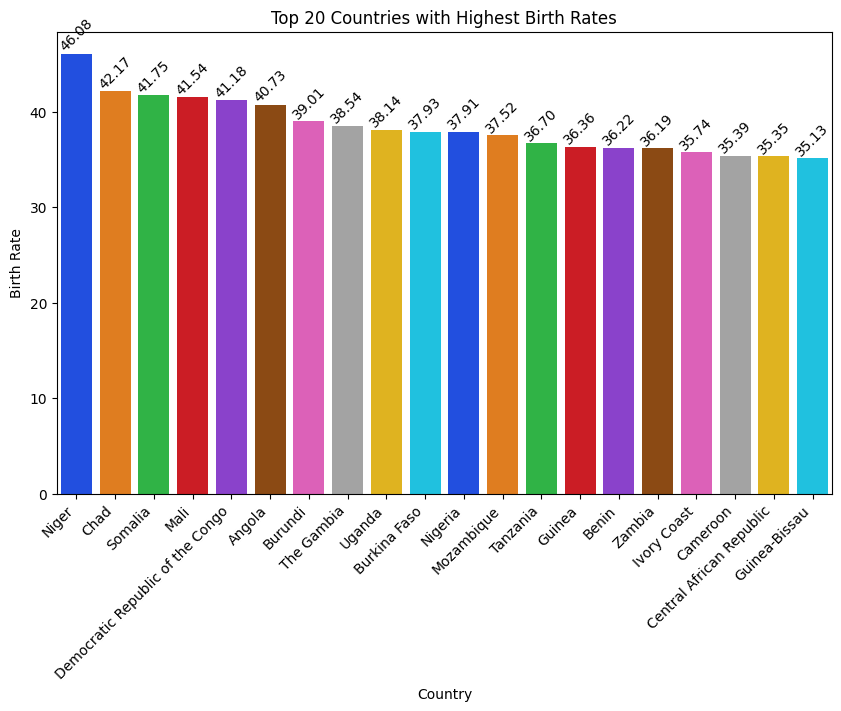

In [7]:
# Sort the dataframe by 'Birth Rate' column in descending order
sorted_df = df.sort_values(by='Birth Rate', ascending=False)

# Get the top 20 countries with the highest birth rates
top_country_birth = sorted_df.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_country_birth, x='Country', y='Birth Rate', palette='bright')

plt.title('Top 20 Countries with Highest Birth Rates')
plt.xlabel('Country')
plt.ylabel('Birth Rate')

plt.xticks(rotation=45, ha='right')

for index, value in enumerate(top_country_birth['Birth Rate']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10, rotation = 45)

# Show the plot
plt.show()


## 6. Top 20 Countries: Largest area

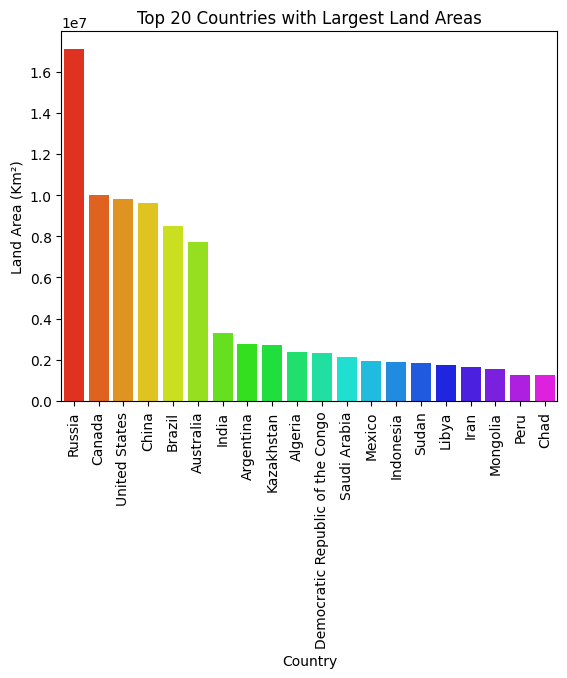

In [8]:
sorted_df = df.sort_values(by='Land Area(Km2)', ascending=False)
top_land_area_countries = sorted_df.head(20)
top_land_vs_population_countries = sorted_df.head(20)

sns.barplot(data=top_land_area_countries, x='Country', y='Land Area(Km2)', palette='gist_rainbow')
plt.title('Top 20 Countries with Largest Land Areas')
plt.xlabel('Country')
plt.ylabel('Land Area (Km²)')
plt.xticks(rotation = 90)

plt.show()

## 7. Top 20 Countries: Highest CO2 Emissions

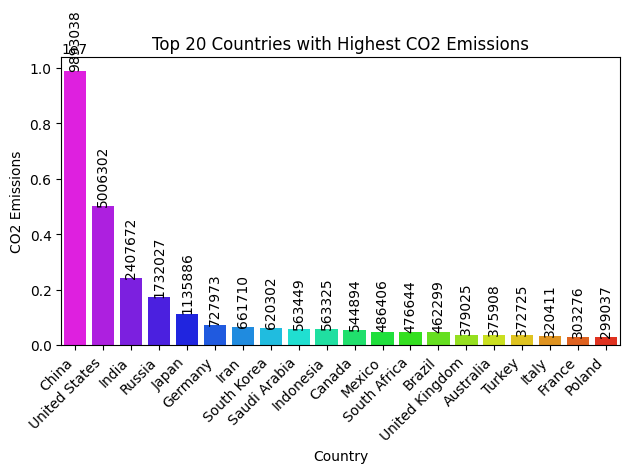

In [9]:
# Sort the DataFrame by CO2 emissions column in descending order and get the top 20 rows
top_co2_emissions_countries = df.sort_values(by='Co2-Emissions', ascending=False).head(20)

sns.barplot(data=top_co2_emissions_countries, x='Country', y='Co2-Emissions', palette='gist_rainbow_r')
plt.title('Top 20 Countries with Highest CO2 Emissions')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions')
plt.xticks(rotation=45, ha='right')

for index , value in enumerate(top_co2_emissions_countries['Co2-Emissions']):
    plt.text(index, value,f'{value:.0f}',ha = 'center',va = 'bottom', fontsize = 10, rotation = 90)
plt.tight_layout()
plt.show()


## 8. Top 20 Countries: Highest GDP

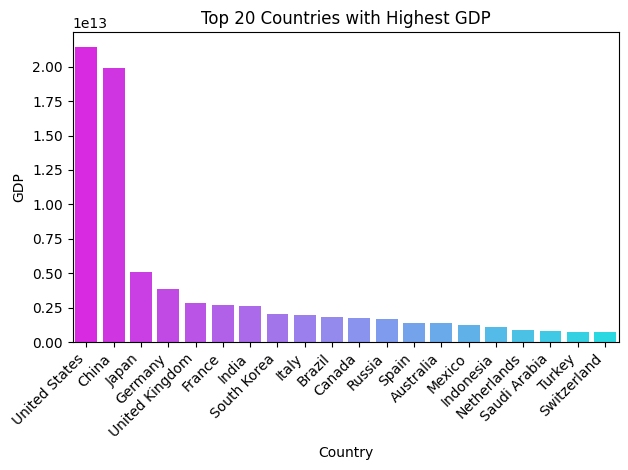

In [10]:
top_gdp_countries = df.sort_values(by='GDP', ascending=False).head(20)

sns.barplot(data=top_gdp_countries, x='Country', y='GDP', palette='cool_r')
plt.title('Top 20 Countries with Highest GDP')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## 9. Urbanization Trends by Country

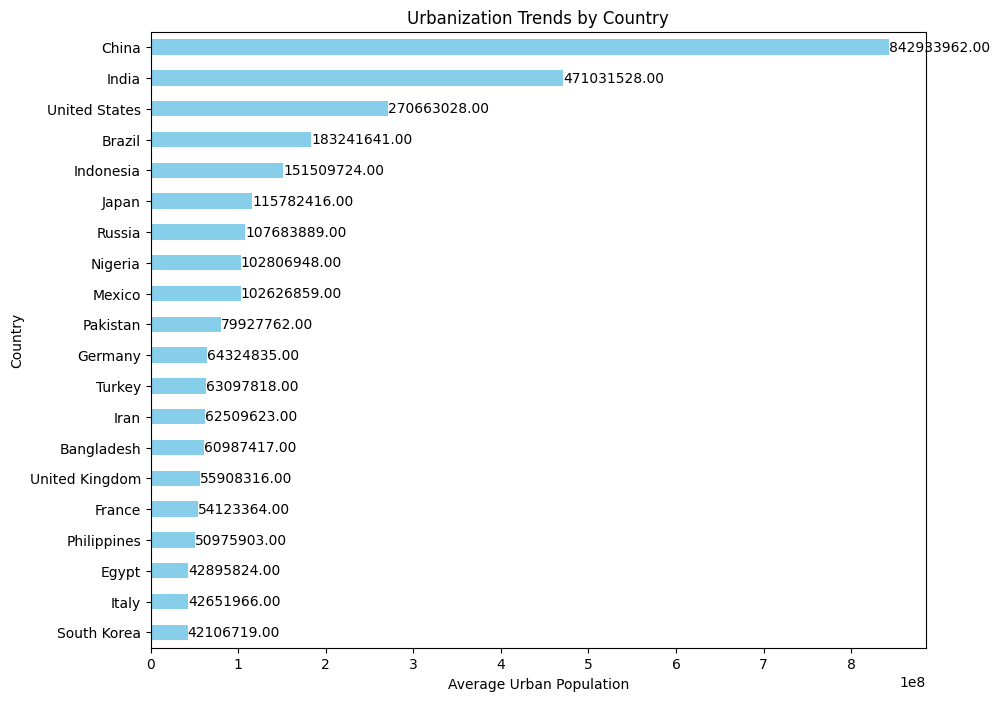

In [11]:
subset_countries = 20
urbanization_by_country = df.groupby('Country')['Urban_population'].mean().sort_values(ascending=False).head(subset_countries)

plt.figure(figsize=(10, 8))
ax = urbanization_by_country.plot(kind='barh', color='skyblue')
plt.title('Urbanization Trends by Country')
plt.xlabel('Average Urban Population')
plt.ylabel('Country')
plt.gca().invert_yaxis()

for index, value in enumerate(urbanization_by_country):
    ax.text(value + 2, index, f'{value:.2f}', va='center', color='black')  # Display values on a separate axis

plt.show()


## 10. Top 20 Countries: Highest Tertiary Education Enrollment Rates

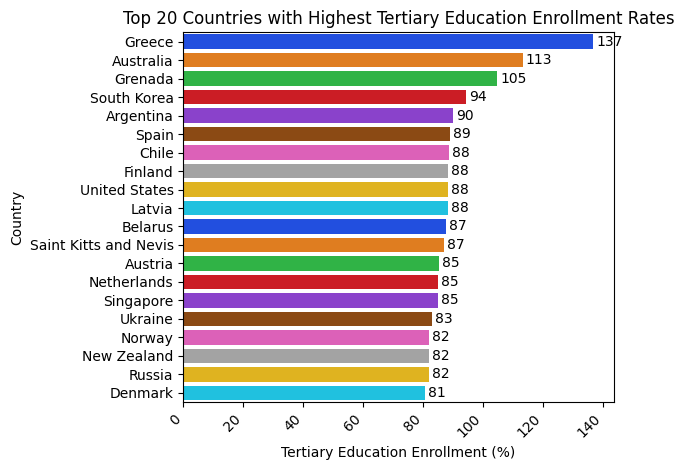

In [12]:
top_tertiary_enrollment_countries = df.sort_values(by='Gross tertiary education enrollment (%)', ascending=False).head(20)

ax = sns.barplot(data=top_tertiary_enrollment_countries, x='Gross tertiary education enrollment (%)', y='Country', palette='bright')
plt.title('Top 20 Countries with Highest Tertiary Education Enrollment Rates')
plt.xlabel('Tertiary Education Enrollment (%)')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')

for index, value in enumerate(top_tertiary_enrollment_countries['Gross tertiary education enrollment (%)']):
    ax.text(value + 1, index, f'{value:.0f}', va='center', color='black')

plt.tight_layout()
plt.show()

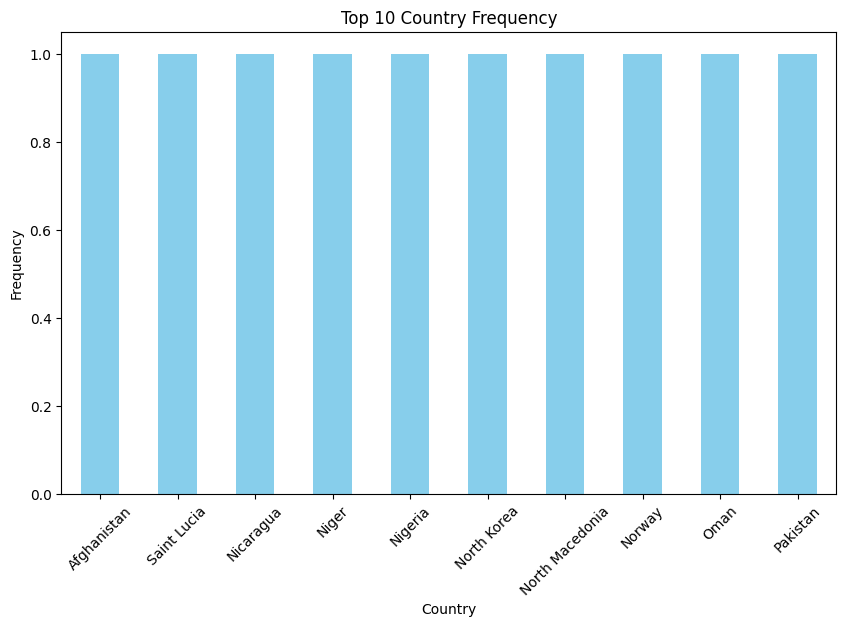

In [15]:
import matplotlib.pyplot as plt

# Get the top 10 countries by frequency
top_10_countries = df['Country'].value_counts().head(10)

# Plot bar chart for the top 10 countries
plt.figure(figsize=(10,6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Country Frequency')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Word Chart (Bar Chart for Text Frequency)
We can count the occurrences of categorical data, such as the capital cities or countries, and plot a bar chart.

Observation: This chart shows the frequency of countries in the dataset, which can help identify if some countries are over-represented in the data.

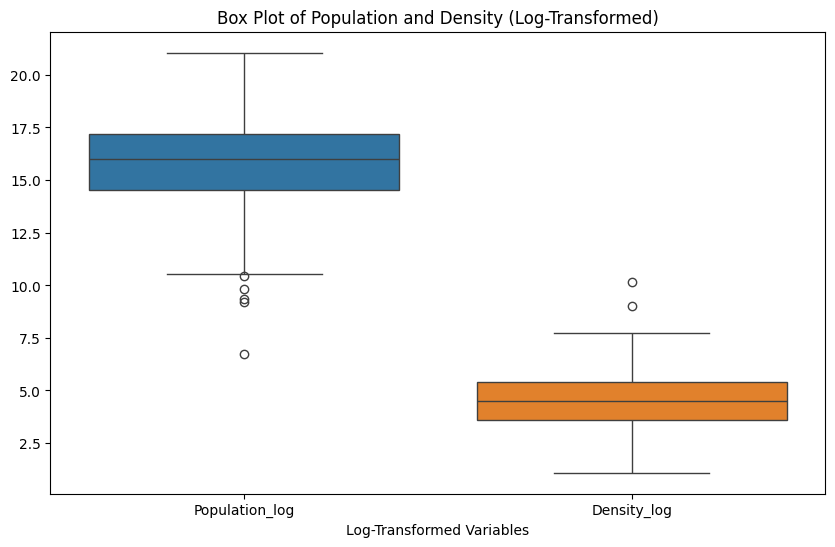

In [17]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Apply log transformation to reduce the skewness
df['Population_log'] = np.log1p(df['Population'])  # log1p adds 1 to avoid log(0)
df['Density_log'] = np.log1p(df['Density\n(P/Km2)'])

# Box plot for log-transformed Population and Density
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Population_log', 'Density_log']])
plt.title('Box Plot of Population and Density (Log-Transformed)')
plt.xlabel('Log-Transformed Variables')
plt.show()


Observations:
Log transformation reduces the impact of extremely large values and makes the box plot more interpretable.
You can see a clearer distribution of values without extreme skewness.

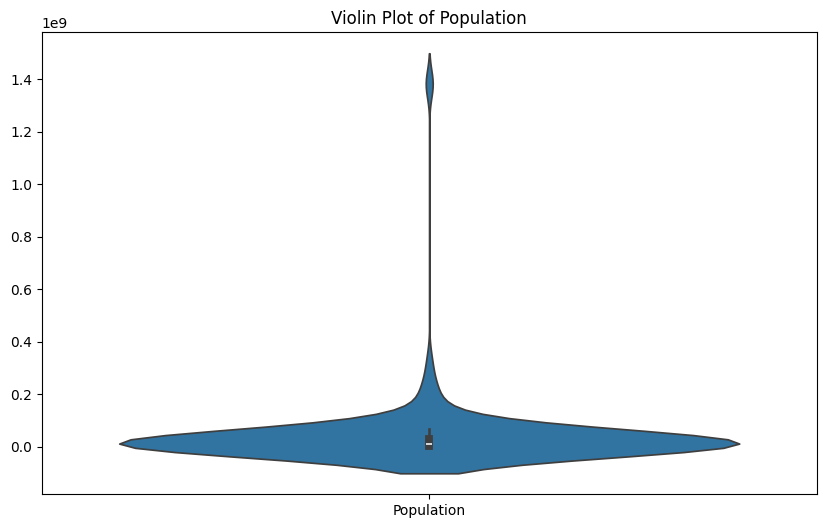

In [18]:
# Violin plot for Population
plt.figure(figsize=(10,6))
sns.violinplot(data=df[['Population']])
plt.title('Violin Plot of Population')
plt.show()


Observation: The violin plot gives a smooth estimate of the data’s distribution, showing peaks and data concentration, giving insights into the distribution spread of country populations.



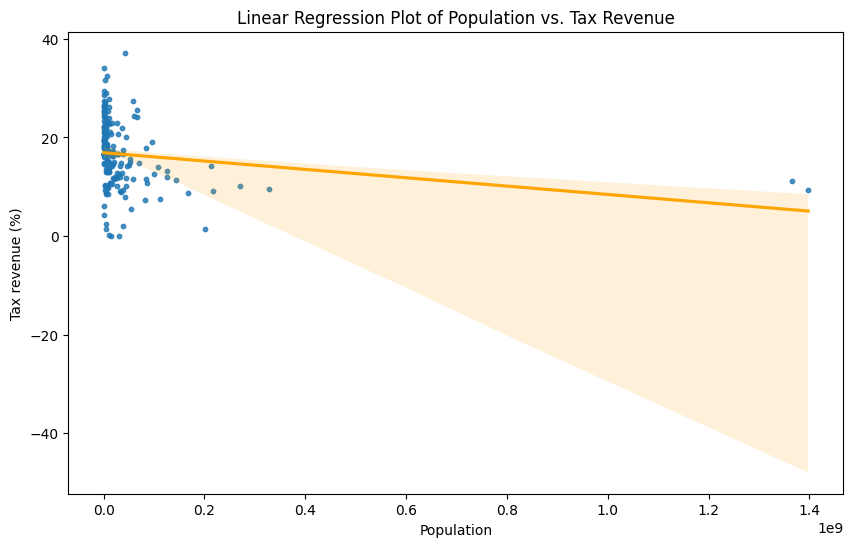

In [19]:
# Regression plot for Population vs. Tax revenue
plt.figure(figsize=(10,6))
sns.regplot(x='Population', y='Tax revenue (%)', data=df, scatter_kws={'s':10}, line_kws={'color':'orange'})
plt.title('Linear Regression Plot of Population vs. Tax Revenue')
plt.show()


Observation: This plot shows whether there is a linear relationship between population and tax revenue, with the regression line indicating the trend.



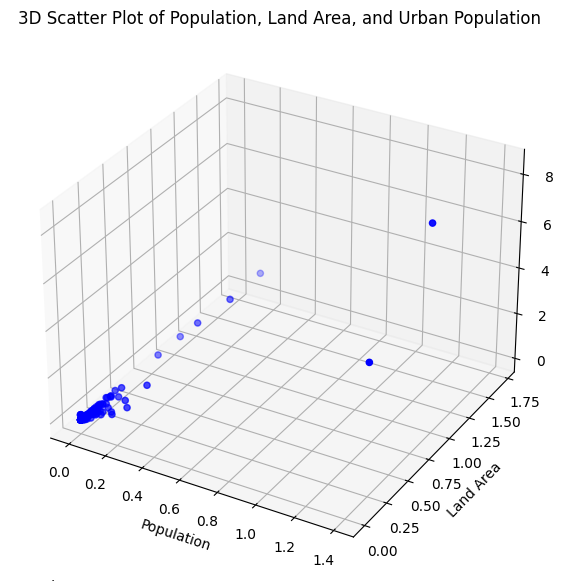

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Population'], df['Land Area(Km2)'], df['Urban_population'], c='b', marker='o')
ax.set_xlabel('Population')
ax.set_ylabel('Land Area')
ax.set_zlabel('Urban Population')

plt.title('3D Scatter Plot of Population, Land Area, and Urban Population')
plt.show()


Observation: This chart helps visualize the interactions between population, land area, and urban population density, showing how urbanization varies with population and area.

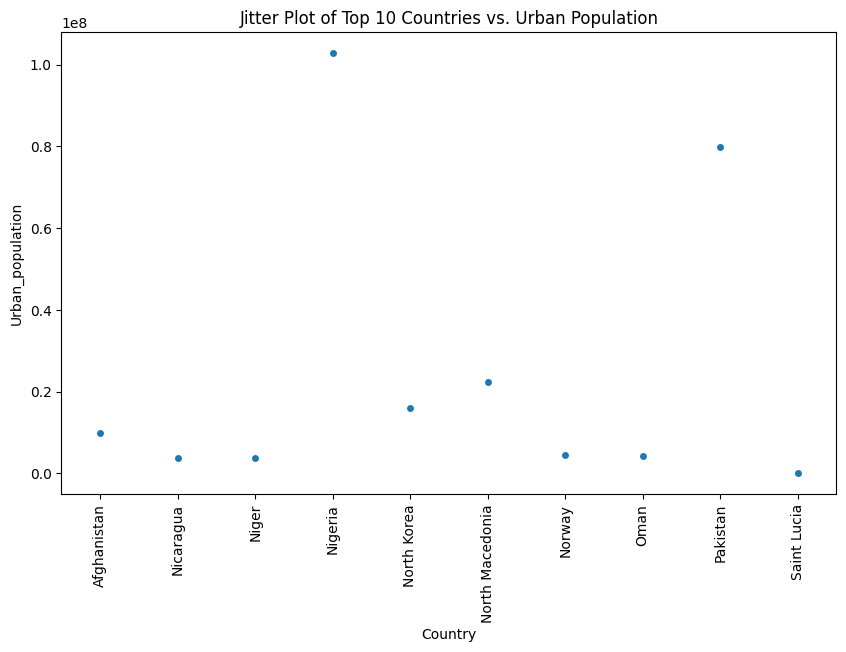

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 10 countries by frequency
top_10_countries = df['Country'].value_counts().head(10).index

# Filter the dataset for only the top 10 countries
df_top_10 = df[df['Country'].isin(top_10_countries)]

# Create a jitter plot for Urban Population of the top 10 countries
plt.figure(figsize=(10,6))
sns.stripplot(x='Country', y='Urban_population', data=df_top_10, jitter=True)
plt.xticks(rotation=90)
plt.title('Jitter Plot of Top 10 Countries vs. Urban Population')
plt.show()



Observation: The jitter plot makes overlapping points more visible by spreading them slightly, helping to see patterns in urban population distribution among countries.

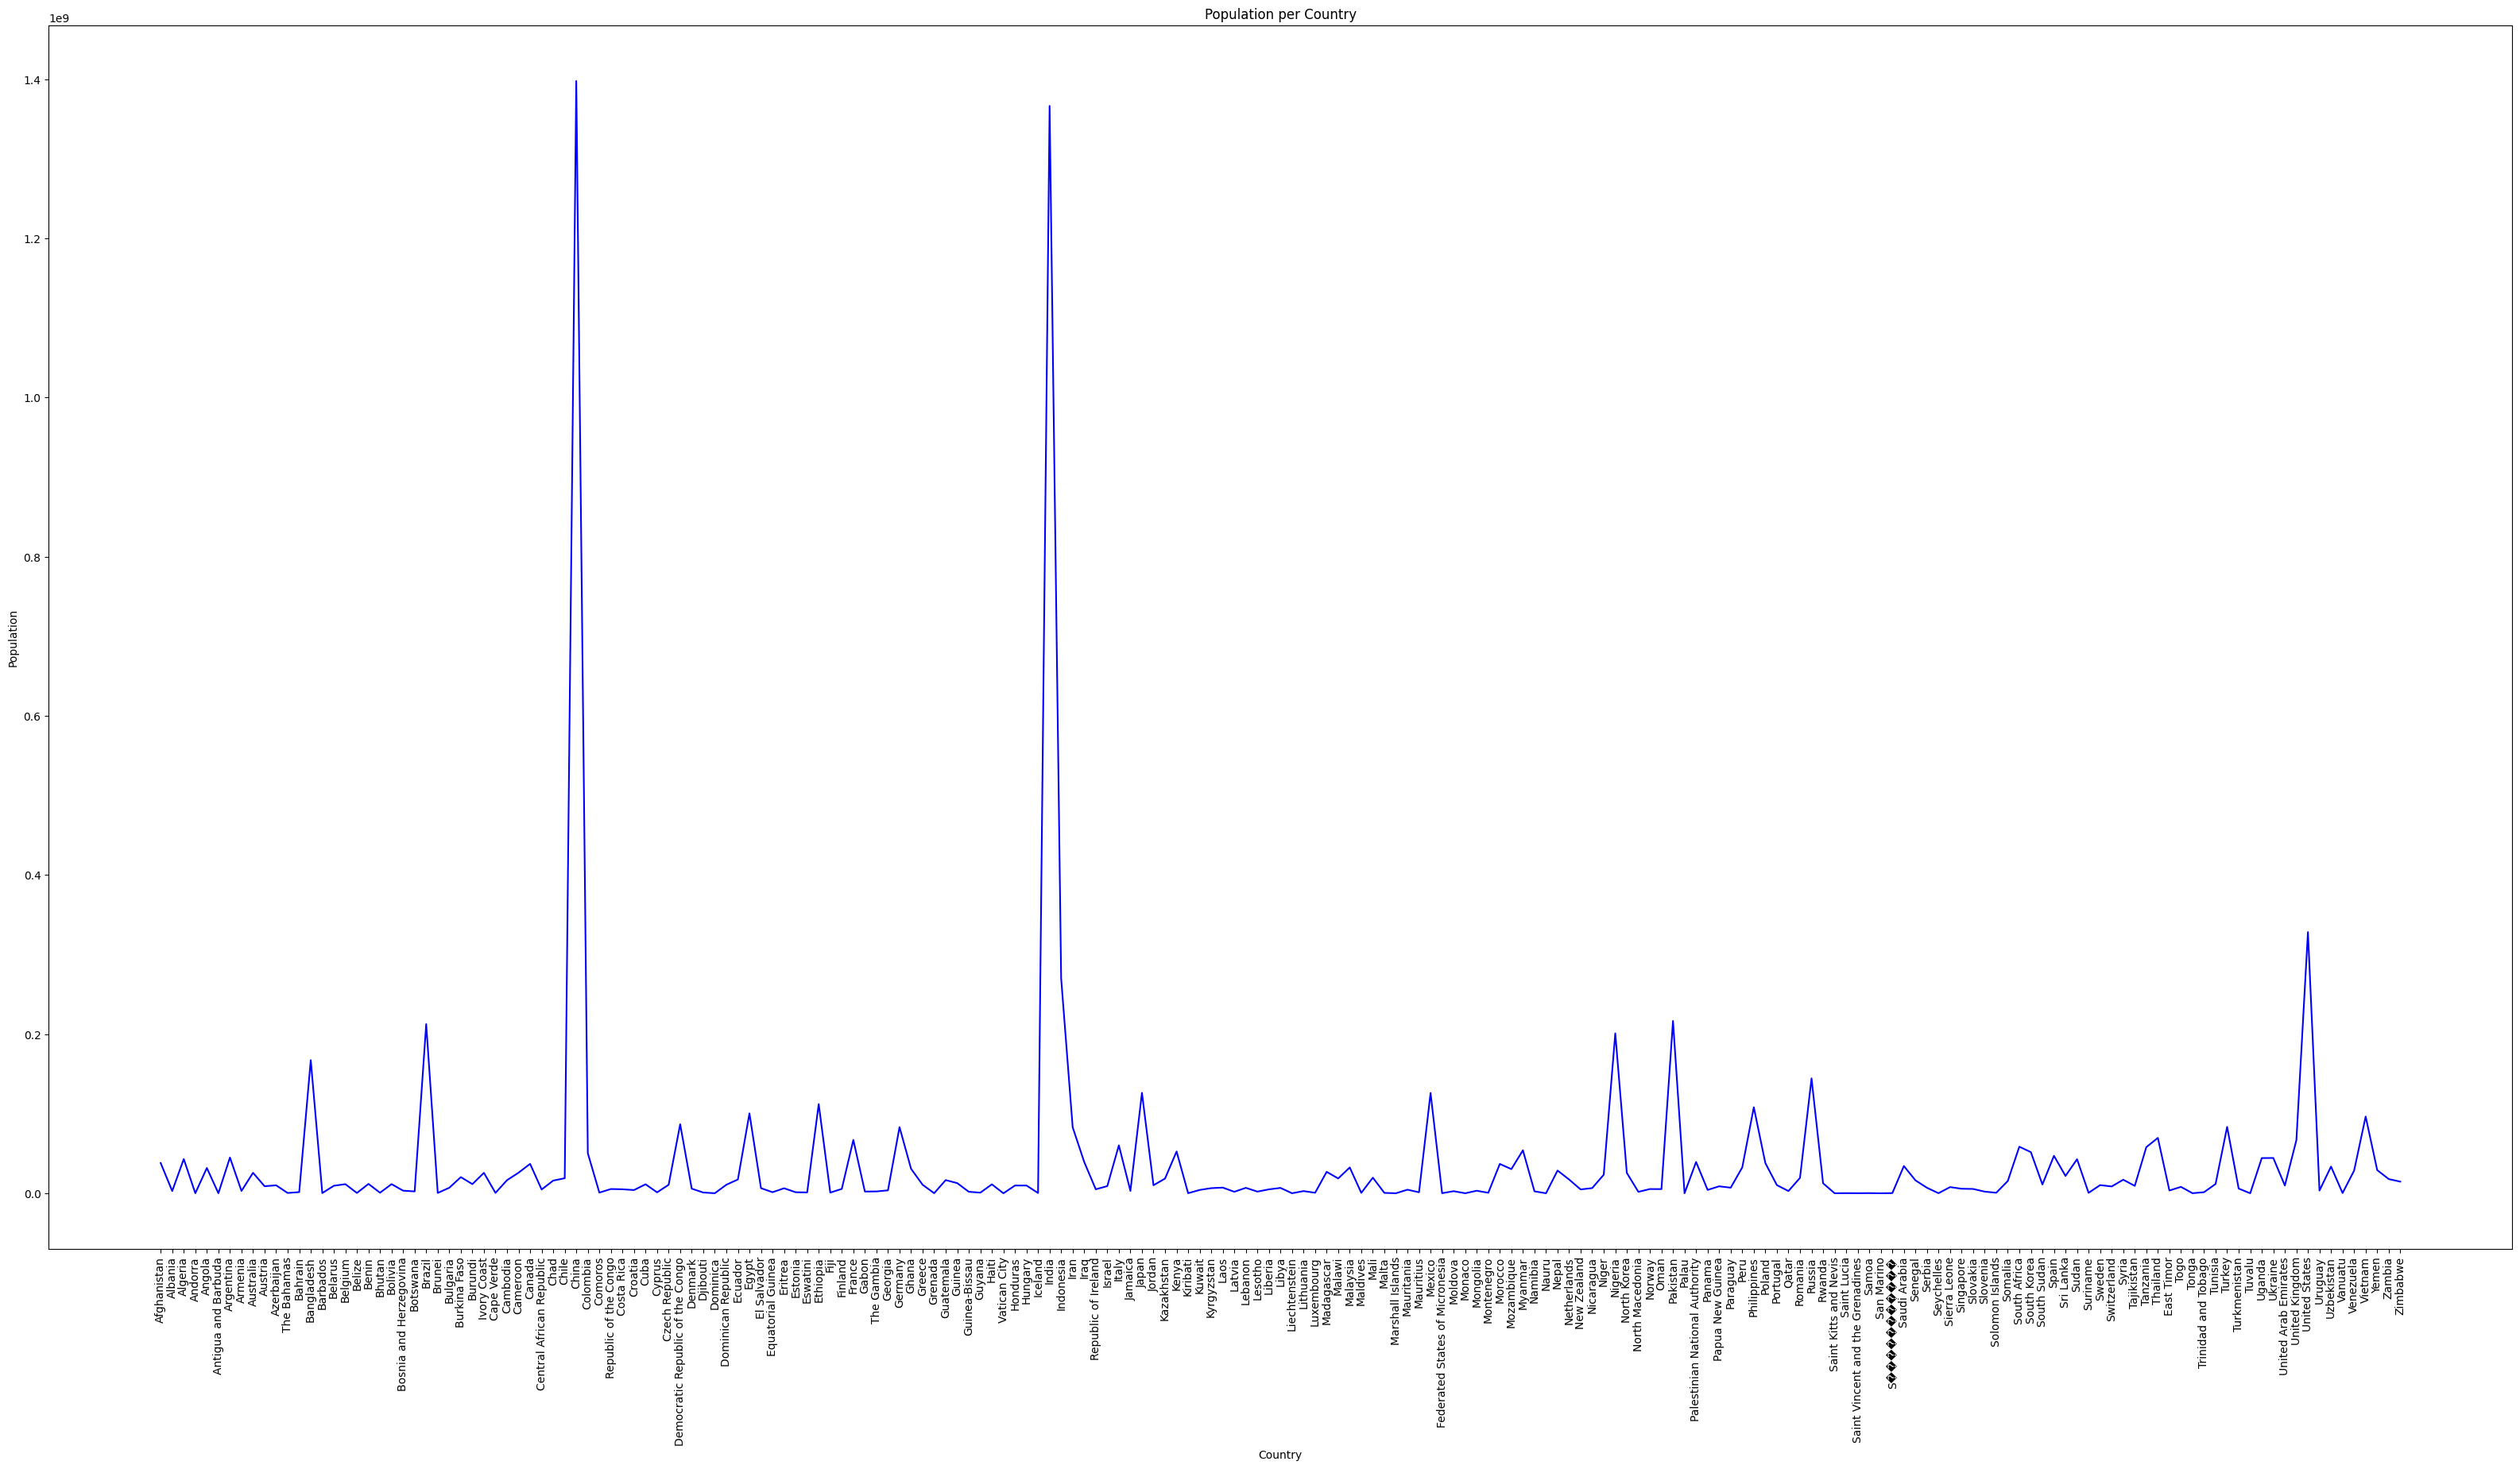

In [28]:
import matplotlib.pyplot as plt

# Line plot for Population vs Country with increased figure size
plt.figure(figsize=(40,20))  # Increased width for more space
plt.plot(df['Country'], df['Population'], color='blue')
plt.xticks(rotation=90)
plt.title('Population per Country')
plt.xlabel('Country')
plt.ylabel('Population')
plt.show()



Observation: This chart shows the changes or distribution of population across different countries.

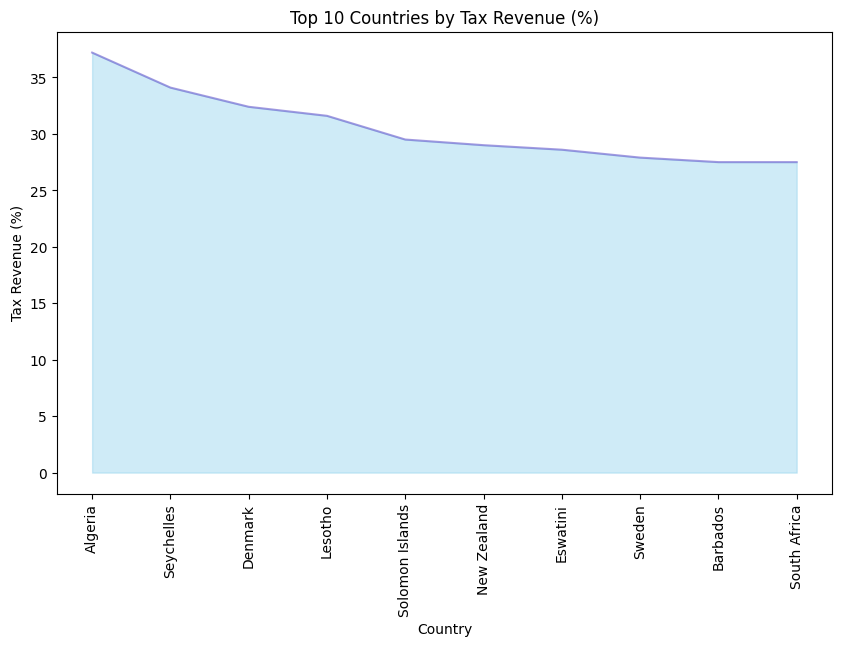

In [30]:
# Sort the DataFrame by Tax Revenue and select the top 10 countries
df_sorted_top_10 = df.sort_values('Tax revenue (%)', ascending=False).head(10)

# Area plot for Tax Revenue across the top 10 countries
plt.figure(figsize=(10,6))
plt.fill_between(df_sorted_top_10['Country'], df_sorted_top_10['Tax revenue (%)'], color="skyblue", alpha=0.4)
plt.plot(df_sorted_top_10['Country'], df_sorted_top_10['Tax revenue (%)'], color="Slateblue", alpha=0.6)
plt.xticks(rotation=90)
plt.title('Top 10 Countries by Tax Revenue (%)')
plt.xlabel('Country')
plt.ylabel('Tax Revenue (%)')
plt.show()



Observation: This chart shows the cumulative tax revenue by country, emphasizing the contribution of each country to the total.



In [32]:
pip install waterfallcharts

  Preparing metadata (setup.py) ... done
  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3389 sha256=b94dd7c97e35a93fb2c0b91a64645ed3d5c90b28074a5af116dacbaf2be32a9d
  Stored in directory: /root/.cache/pip/wheels/bd/34/6c/58fce34a3b8ec5607aff650db14ceb41db8223ac217423371b
Successfully built waterfallcharts


<Figure size 1000x600 with 0 Axes>

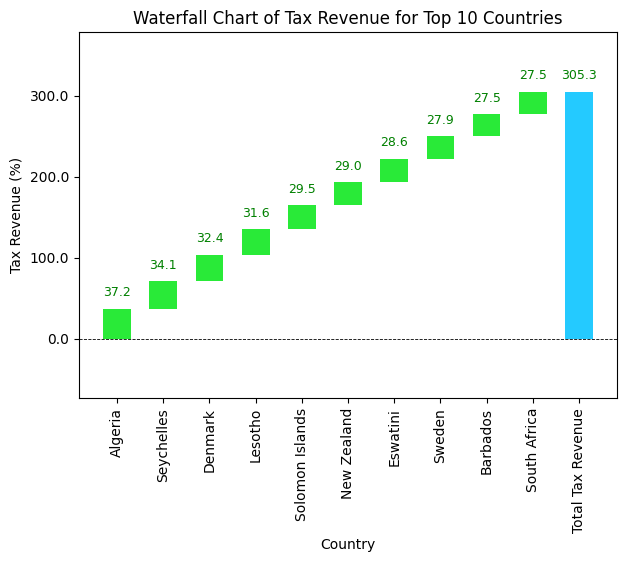

In [33]:
import waterfall_chart
import matplotlib.pyplot as plt

# Sort the DataFrame by Tax Revenue and select the top 10 countries
df_sorted_top_10 = df.sort_values('Tax revenue (%)', ascending=False).head(10)

# Extract relevant data for the waterfall chart
countries = df_sorted_top_10['Country']
tax_revenue = df_sorted_top_10['Tax revenue (%)'].values

# Create the waterfall chart
plt.figure(figsize=(10,6))
waterfall_chart.plot(countries, tax_revenue, net_label="Total Tax Revenue")
plt.title('Waterfall Chart of Tax Revenue for Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Tax Revenue (%)')
plt.xticks(rotation=90)
plt.show()

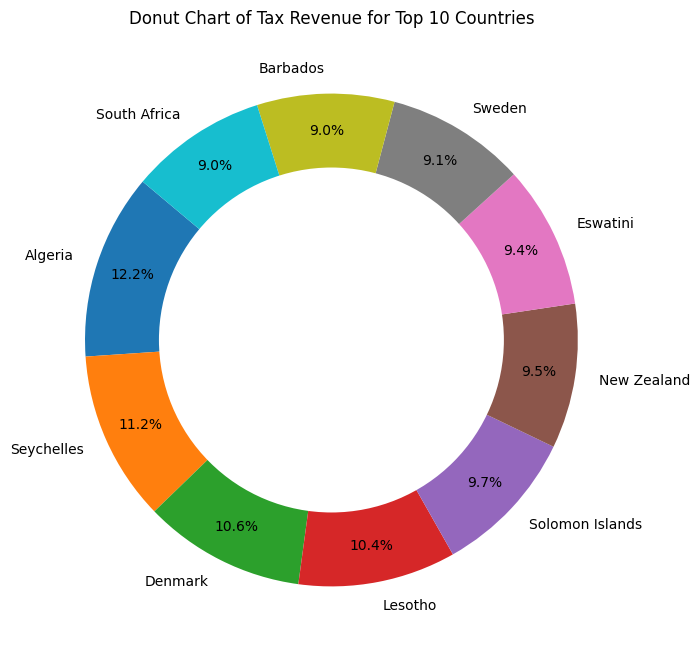

In [34]:
import matplotlib.pyplot as plt

# Data for donut chart
sizes = df_sorted_top_10['Tax revenue (%)']
labels = df_sorted_top_10['Country']

# Plot donut chart
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Donut Chart of Tax Revenue for Top 10 Countries')
plt.show()


In [36]:
pip install squarify

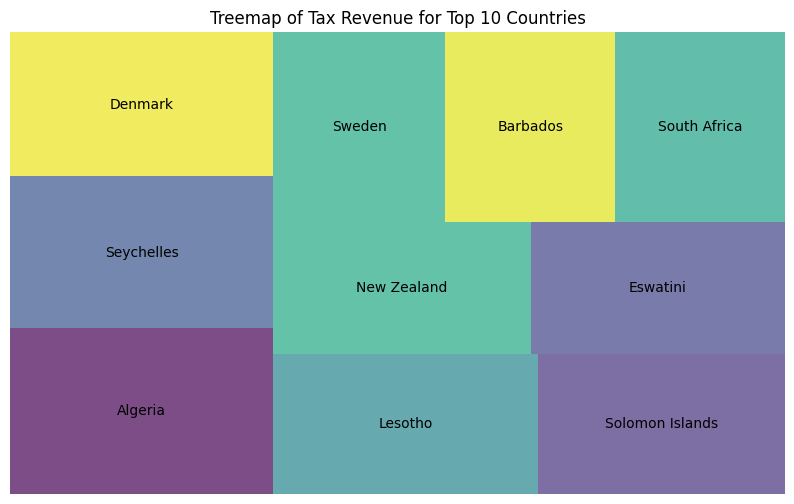

In [37]:
import matplotlib.pyplot as plt
import squarify

# Data for treemap
sizes = df_sorted_top_10['Tax revenue (%)']
labels = df_sorted_top_10['Country']

# Plot treemap
plt.figure(figsize=(10,6))
squarify.plot(sizes=sizes, label=labels, alpha=0.7)
plt.title('Treemap of Tax Revenue for Top 10 Countries')
plt.axis('off')
plt.show()


Observation: The treemap visualizes the size of each country's population, helping to identify relative population sizes at a glance.

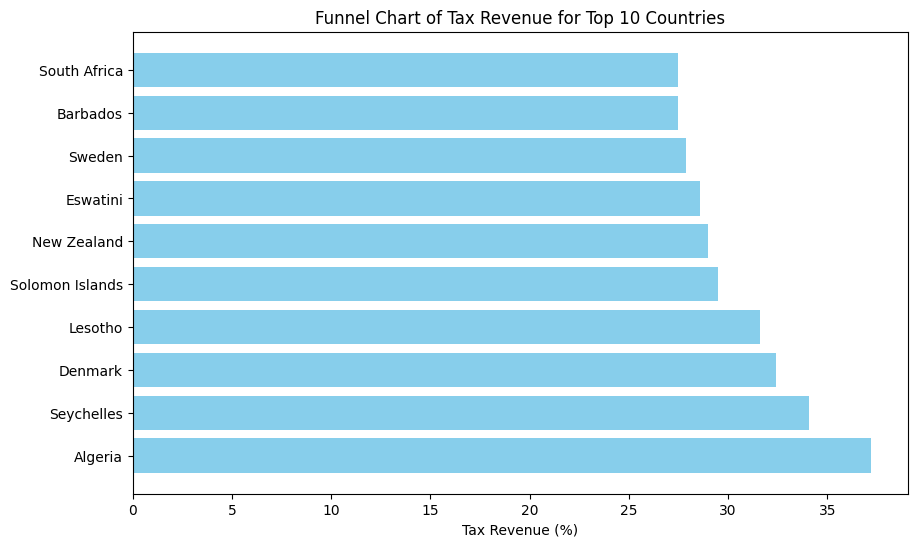

In [38]:
import matplotlib.pyplot as plt

# Data for funnel chart
categories = df_sorted_top_10['Country']
values = df_sorted_top_10['Tax revenue (%)']

# Plot funnel chart
plt.figure(figsize=(10,6))
plt.barh(categories, values, color='skyblue')
plt.xlabel('Tax Revenue (%)')
plt.title('Funnel Chart of Tax Revenue for Top 10 Countries')
plt.show()


Observation: The funnel chart highlights the stages or progression, such as the GDP size of different countries, where countries with larger GDPs appear wider.